In [1]:
#import all required packages..
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/Grocery Data/grocery_timestamp.csv'
path_to_csv_cost = '/content/drive/MyDrive/Colab Notebooks/Grocery Data/Costs.csv'
df = pd.read_csv(path_to_csv, sep=';')
df=df.dropna(axis=0)
df['pay_method'] = df['pay_method'].astype(int)
df_cost = pd.read_csv(path_to_csv_cost, sep=';')
df1 = df.copy()

In [3]:
df.head()

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,930878.0,2,0.0,0:00:22,0:07:10,0:07:10,0:09:43,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1494544.0,2,0.0,0:02:45,0:07:41,0:07:41,0:10:25,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3275833.0,1,0.0,0:03:17,0:23:22,0:23:22,0:26:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,57650.0,2,0.0,0:03:33,0:16:29,0:16:29,0:22:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2002409.0,1,0.0,0:03:59,0:19:11,0:19:11,0:24:25,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df_cost.head()

,product,demanda,price,unit_cost,order_cost
0,air fresheners candles,39,"12,25","10,04",28
1,asian foods,245,"22,95","20,65",9
2,baby accessories,13,"28,92","22,27",21
3,baby bath body care,14,"24,99","20,99",5
4,baby food formula,505,"19,98","15,58",4


In [5]:
del df1['order_id']
del df1['pay_method']
del df1['order_hour_of_day']
del df1['arrival_ timestamp']
del df1['pickup_timestamp']
del df1['start_service_time']
del df1['finish_service_time']
del df1['days_since_prior_order']

In [6]:
df1.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df_cost['price'] = df_cost['price'].str.replace(',','.')
df_cost['price'] = df_cost['price'].astype(float)

In [8]:
df_cost.head

<bound method NDFrame.head of                            product  demanda  price unit_cost  order_cost
0           air fresheners candles       39  12.25     10,04          28
1                      asian foods      245  22.95     20,65           9
2                 baby accessories       13  28.92     22,27          21
3              baby bath body care       14  24.99     20,99           5
4                baby food formula      505  19.98     15,58           4
..                             ...      ...    ...       ...         ...
129              trash bags liners       66  10.99      9,01           4
130           vitamins supplements       74  17.89     15,21          10
131  water seltzer sparkling water     1418   4.19      3,48           4
132                    white wines       23  13.99     10,91          13
133                         yogurt     2172   3.89      3,46           4

[134 rows x 5 columns]>

In [9]:
def cost_total(x):
  cost = df_cost['price']
  price = x.values * cost
  return price.sum().tolist()

df1 = df1.astype(float)
df1 = df1.assign(costtotal=df1.apply(cost_total, axis=1))
df1['total_item'] = df1.iloc[:,1:134].sum(axis=1)

In [10]:
df1.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,costtotal,total_item
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.78,7.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.92,4.0
2,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,198.23,24.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74.19,16.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,104.66,18.0


In [11]:
X = df1[['costtotal','total_item']]
X = pd.DataFrame(X)
X = X.assign(dayprior=df['days_since_prior_order'])
Y = df['pay_method'].astype(np.uint8) -1

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 23, shuffle = True)

In [13]:
X_train.shape
# print(X_train)

(3500, 3)

In [14]:
y_train.head

<bound method NDFrame.head of 4242    2
4194    1
2076    0
1305    0
2095    0
       ..
2998    2
1993    0
1064    2
4838    2
595     1
Name: pay_method, Length: 3500, dtype: uint8>

In [15]:
#Building the RNN
#Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [16]:
# Final model
feature_number = 3
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_shape=(feature_number,),activation='relu'),
  tf.keras.layers.Dense(256,activation='relu'),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(256,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(3,activation='softmax')
])

In [17]:
# Decaying learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=10000,
    decay_rate=0.9)

adam = Adam(learning_rate=lr_schedule)

# Set the training parameters
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 329,731
Trainable params: 329,731
Non-trai

In [18]:
class ReturnBestModel(tf.keras.callbacks.Callback):
    def __init__(self, patience=0):
        super(ReturnBestModel, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf
        self.best_epoch = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("val_loss")
        if np.less(current, self.best):
            self.best = current
            self.best_epoch = epoch
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs=None):
        self.model.set_weights(self.best_weights)
        print(f"Best epoch:{self.best_epoch}")
        print(f"Loss:{self.best}")

In [19]:
print(X_train)
print(y_train)

      costtotal  total_item  dayprior
4242      49.21         8.0      19.0
4194      38.50         6.0      11.0
2076      31.77         3.0      30.0
1305     103.94        16.0      30.0
2095      93.95        14.0      11.0
...         ...         ...       ...
2998      37.98         5.0       2.0
1993      81.57        15.0      30.0
1064      48.74         9.0      30.0
4838      54.78         8.0      11.0
595       88.42        16.0      13.0

[3500 rows x 3 columns]
4242    2
4194    1
2076    0
1305    0
2095    0
       ..
2998    2
1993    0
1064    2
4838    2
595     1
Name: pay_method, Length: 3500, dtype: uint8


In [20]:
# Fitting the RNN to the Training set
epoch = 30
batch_size = 50
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size = batch_size, verbose=1, callbacks=[ReturnBestModel()])

Epoch 1/30
70/70 [==============================] - 2s 10ms/step - loss: 1.1356 - accuracy: 0.3789 - val_loss: 1.0927 - val_accuracy: 0.3767
Epoch 2/30
70/70 [==============================] - 0s 6ms/step - loss: 1.0926 - accuracy: 0.3860 - val_loss: 1.0875 - val_accuracy: 0.3787
Epoch 3/30
70/70 [==============================] - 0s 6ms/step - loss: 1.0951 - accuracy: 0.3829 - val_loss: 1.0893 - val_accuracy: 0.3853
Epoch 4/30
70/70 [==============================] - 0s 5ms/step - loss: 1.0890 - accuracy: 0.4006 - val_loss: 1.0873 - val_accuracy: 0.3840
Epoch 5/30
70/70 [==============================] - 0s 6ms/step - loss: 1.0831 - accuracy: 0.4057 - val_loss: 1.0907 - val_accuracy: 0.3880
Epoch 6/30
70/70 [==============================] - 1s 7ms/step - loss: 1.0880 - accuracy: 0.3900 - val_loss: 1.0878 - val_accuracy: 0.3833
Epoch 7/30
70/70 [==============================] - 0s 7ms/step - loss: 1.0872 - accuracy: 0.3983 - val_loss: 1.0863 - val_accuracy: 0.3827
Epoch 8/30
70/70 [=

In [21]:
result = model.predict(X_test)
result = np.argmax(result,axis=1)
result = pd.DataFrame(result)

In [22]:
result

,0
0,2
1,2
2,2
3,0
4,0
...,...
1495,2
1496,2
1497,0
1498,0


In [23]:
ypd = pd.DataFrame(y_test)
ypd

,pay_method
1650,1
951,1
3222,0
2229,2
431,0
...,...
2690,1
1890,0
3423,2
3814,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


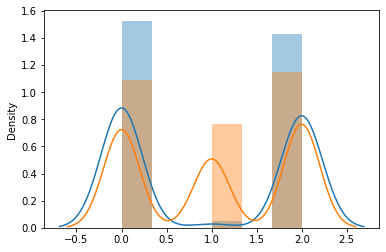

In [24]:
import seaborn as sns
sns.distplot(result)
sns.distplot(ypd)